# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


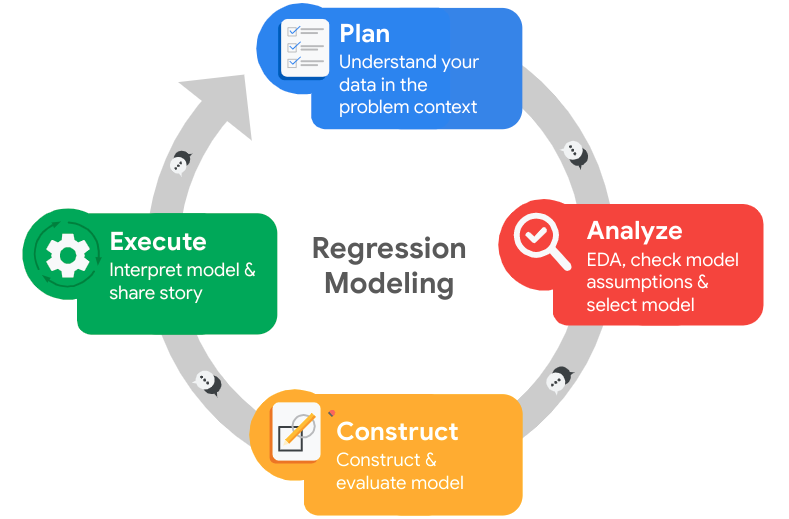

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [37]:
# Import packages
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [38]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [39]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [40]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [41]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [42]:
# Rename columns as needed
df0.rename(columns={'time_spend_company':'years_with_company', 'Work_accident':'work_accident', 'Department':'department','average_montly_hours':'average_monthly_hours'}, inplace=True)


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'years_with_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [43]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
years_with_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [44]:
# Check for duplicates
df0.duplicated().sum()


3008

In [45]:
# Inspect some rows containing duplicates as needed
duplicate_mask = df0.duplicated()
duplicate_rows = df0[duplicate_mask]
duplicate_rows


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,years_with_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [46]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_no_dups = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df_no_dups.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,years_with_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

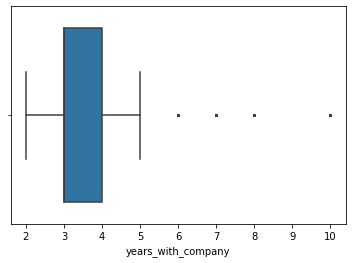

In [47]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x=df_no_dups['years_with_company'], fliersize=1)


In [48]:
# Determine the number of rows containing outliers
num_outliers = df_no_dups[df_no_dups['years_with_company'].isin([6, 7, 8, 10])].shape
num_outliers


(824, 10)

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [49]:
# Get numbers of people who left vs. stayed
print('Number of people who left:\n' + df_no_dups.left.value_counts().to_string())


# Get percentages of people who left vs. stayed

print('Percentage of people who left:\n' + df_no_dups.left.value_counts(normalize=True).to_string())



Number of people who left:
0    10000
1     1991
Percentage of people who left:
0    0.833959
1    0.166041


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

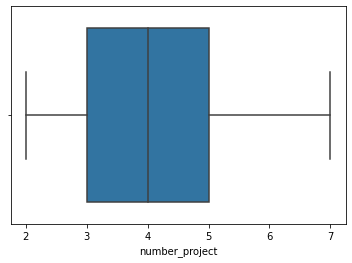

In [50]:
# Create a plot as needed
sns.boxplot(x=df_no_dups['number_project'], fliersize=1)

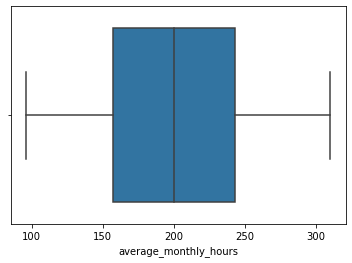

In [51]:
# Create a plot as needed
sns.boxplot(x=df_no_dups['average_monthly_hours'], fliersize=1)

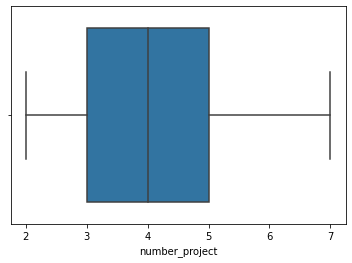

In [52]:
# Create a plot as needed
sns.boxplot(x=df_no_dups['number_project'], fliersize=1)

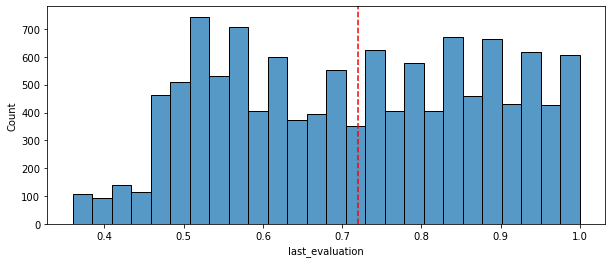

In [53]:
# Create a plot as needed
plt.figure(figsize=(10,4))
sns.histplot(x=df_no_dups['last_evaluation'])
median = df_no_dups['last_evaluation'].median()
plt.axvline(median, color='red', linestyle='--')


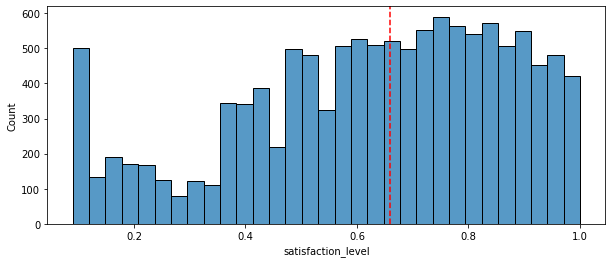

In [54]:
# Create a plot as needed
plt.figure(figsize=(10,4))
sns.histplot(x=df_no_dups['satisfaction_level'])
median = df_no_dups['satisfaction_level'].median()
plt.axvline(median, color='red', linestyle='--')


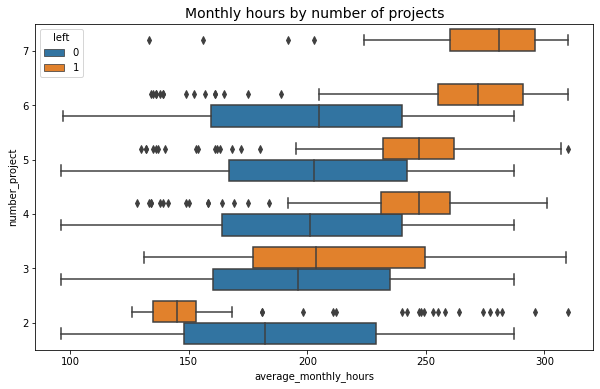

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot boxplot
sns.boxplot(data=df_no_dups, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax)

# Invert y-axis
ax.invert_yaxis()

# Set title
ax.set_title('Monthly hours by number of projects', fontsize=14)

# Show plot
plt.show()

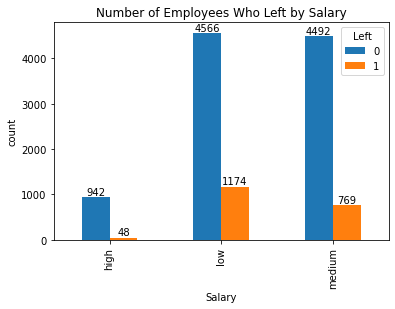

<Figure size 720x288 with 0 Axes>

In [56]:
# Create a plot as needed
df_grouped = df_no_dups.groupby(['salary', 'left']).size().unstack()
ax = df_grouped.plot(kind='bar', stacked=False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Salary')
plt.ylabel('count')
plt.title('Number of Employees Who Left by Salary')
plt.legend(title='Left', loc='upper right')
plt.figure(figsize=(10,4))
plt.show()

<Figure size 1080x720 with 0 Axes>

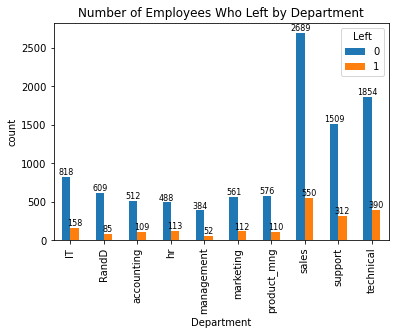

In [57]:
# Create a plot as needed
plt.figure(figsize=(15,10))
df_grouped = df_no_dups.groupby(['department', 'left']).size().unstack()
ax = df_grouped.plot(kind='bar', stacked=False)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8, color='black', rotation=0)
plt.xlabel('Department')
plt.ylabel('count')
plt.title('Number of Employees Who Left by Department')
plt.legend(title='Left', loc='upper right')
plt.show()

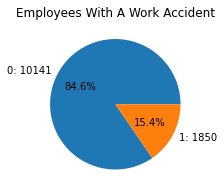

In [58]:
# Create a plot as needed
fig = plt.figure(figsize=(3,3))
data=df_no_dups['work_accident'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Employees With A Work Accident');

In [59]:
df_no_dups.corr(method='pearson')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,years_with_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
years_with_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


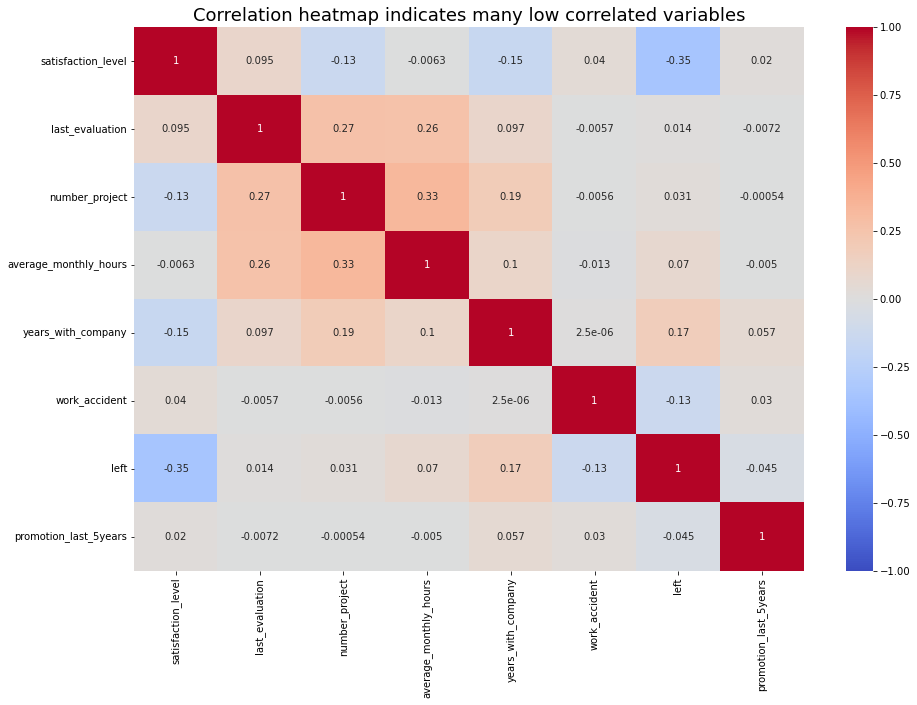

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(df_no_dups.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [64]:
# Determine the number of rows containing outliers 
### YOUR CODE HERE ###

# Compute the 25th percentile value in `years_with_company`
percentile25 = df_no_dups['years_with_company'].quantile(0.25)

# Compute the 75th percentile value in `years_with_company`
percentile75 = df_no_dups['years_with_company'].quantile(0.75)

# Compute the interquartile range in `years_with_company`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `years_with_company`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `years_with_company`
outliers = df_no_dups[(df_no_dups['years_with_company'] > upper_limit) | (df_no_dups['years_with_company'] < lower_limit)]

# Count how many rows in the data contain outliers in `years_with_company`
print("Number of rows in the data containing outliers in `years_with_company`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `years_with_company`: 824


In [66]:
df_capstone = df_no_dups[(df_no_dups['years_with_company'] >= lower_limit) & (df_no_dups['years_with_company'] <= upper_limit)]

# Display first few rows of new dataframe
df_capstone.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,years_with_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


In [67]:
### Create numeric catigories for salary

df_capstone['salary'] = (df_capstone['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

In [68]:
### Create dummies column for department
department_encoded = pd.get_dummies(df_capstone['department'])
df_capstone = pd.concat([df_capstone, department_encoded], axis=1)
df_capstone.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,years_with_company,work_accident,left,promotion_last_5years,department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0


In [69]:
# Isolate predictor variables
X = df_capstone.drop(columns = ['left', 'department'])

In [70]:
# Isolate target variable
y = df_capstone['left']

In [71]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=11)

In [72]:
# Fit the model
model = LogisticRegression(random_state=11, max_iter=400)

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=11, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_preds = model.predict(X_test)

In [74]:
model.score(X_test, y_test)

0.8248567335243553

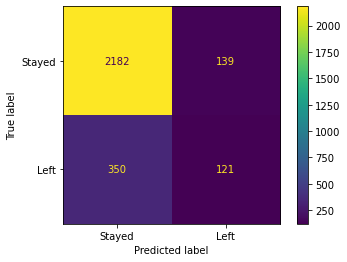

In [81]:
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Left'],)
disp.plot(values_format='');

In [84]:
import sklearn.metrics as metrics
print('Ability to predict who would leave:')
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_preds))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_preds))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_preds))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_preds))

Ability to predict who would leave:
Accuracy: 0.824857
Precision: 0.465385
Recall: 0.256900
F1 Score: 0.331053


In [83]:
df_capstone.left.value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [85]:
# Create a classification report
target_labels = ['Stayed', 'Left']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

      Stayed       0.86      0.94      0.90      2321
        Left       0.47      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.66      0.60      0.62      2792
weighted avg       0.79      0.82      0.80      2792



In [86]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('years_with_company', 1.0745605604351045),
 ('sales', 0.08998563599932331),
 ('support', 0.0086573102215139),
 ('average_monthly_hours', 0.003909211093817876),
 ('hr', -0.014181640502911173),
 ('IT', -0.05886697400506376),
 ('last_evaluation', -0.060462849971547224),
 ('product_mng', -0.06895275217377247),
 ('technical', -0.07186591065177125),
 ('marketing', -0.07190687155721825),
 ('management', -0.15129008668057134),
 ('accounting', -0.16201305320412712),
 ('RandD', -0.3518556213249621),
 ('number_project', -0.47753036797364173),
 ('salary', -0.5458585740149584),
 ('promotion_last_5years', -1.2990902954577876),
 ('work_accident', -1.4539133284009027),
 ('satisfaction_level', -4.474268592807222)]

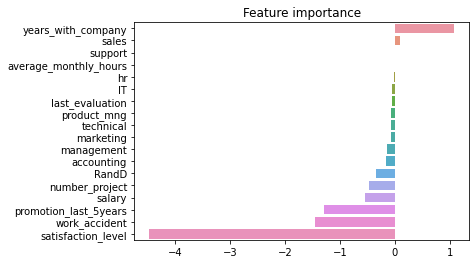

In [87]:
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

In [88]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV

rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate GridSearch
rf_val = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='accuracy')

In [92]:
%%time
rf_val.fit(X_train, y_train)

CPU times: user 11min 20s, sys: 11 s, total: 11min 31s
Wall time: 11min 37s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [93]:
# Obtain optimal parameters.

rf_val.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [99]:
rf_val.best_score_

0.9841194736080746

In [94]:
# Use optimal parameters on GridSearchCV.
rf_opt = RandomForestClassifier(n_estimators = 500, max_depth = None, 
                                min_samples_leaf = 1, min_samples_split = 4,
                                max_features=1.0, max_samples = 0.7, random_state = 0)

In [95]:
# Fit the optimal model.
rf_opt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [96]:
# Predict on test set.

y_pred = rf_opt.predict(X_test)

In [98]:
print('Ability to predict who would leave:')
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Ability to predict who would leave:
Accuracy: 0.983166
Precision: 0.981818
Recall: 0.917197
F1 Score: 0.948408


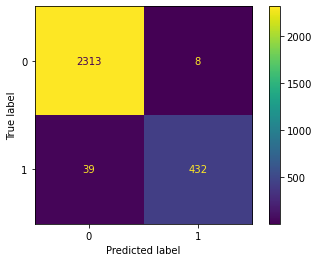

In [100]:
# Generate array of values for confusion matrix
preds = rf_val.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf_val.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_val.classes_)
disp.plot(values_format='');

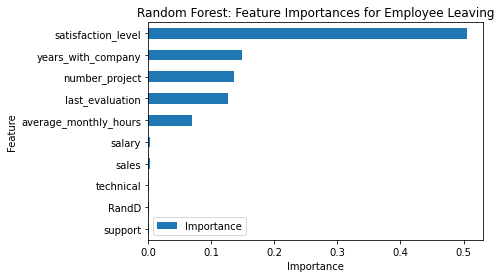

In [101]:
# Get feature importances
feat_impt = rf_val.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_val.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression Model**

The logistic regression model achieved precision of 46%, recall of 25%, f1-score of 33%, and accuracy of 82%, on the test set.

**Random Forest Model**

The random forest model achieved precision of 98%, recall of 92%, f1-score of 94%, and accuracy of 98%, on the test set. The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

It seems that the number of projects and the average monthly hours play significant roles that contribute to low employee satisfaction and ultimately result in employees leaving.